# Exploring Earnings Based on College Majors

For this project I will be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors). 

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')


In [3]:
recent_grads.head()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Dropping any missing values:

In [5]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]

print ('Before cleaning: ',raw_data_count, '. After cleaning: ', cleaned_data_count)

Before cleaning:  173 . After cleaning:  172


## Exploring data by scatter plots


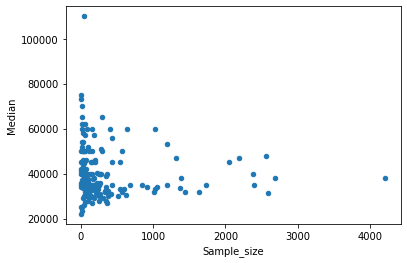

In [6]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

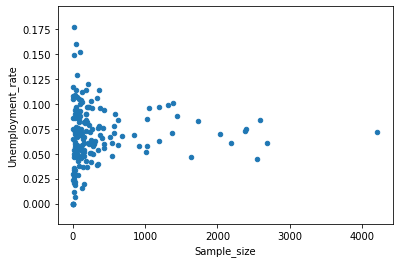

In [7]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

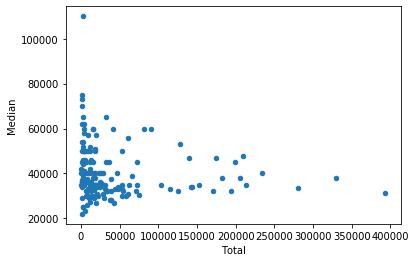

In [8]:
recent_grads.plot(x='Total', y='Median', kind='scatter')

We can see that as the sample size increase, the `median` and `unemployment_rate` values tend to vary towards a defined range (*10 - 
5%* for the latter, and *\\$50,000 - \\$35,000* for the former). Also, the `median` is concentrated between * \\$45,000 - \\$20,000*. Whereas, `Unemployment_rate` values are more dissipated between *0 - 1.25%*.

Observing those plots and the `Total x Median` plot, there is no reason to affirm that students in more popular majors make more money.

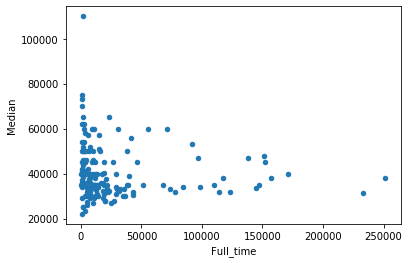

In [9]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

No correlation between `Full_time` and `Median`

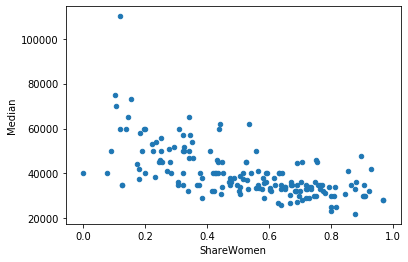

In [10]:
recent_grads.plot(x='ShareWomen', y='Median', kind= 'scatter')

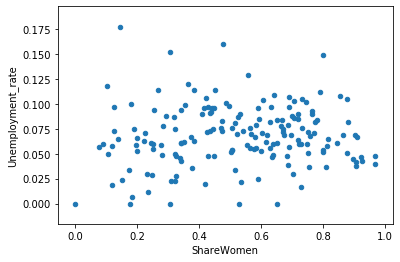

In [11]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind= 'scatter')

There is a inverse proportion between subjects that were majority female and earnings, but no direct correlation in regards to `unemployment_rate`

## **Exploring data by histograms**

### What percent of majors are predominantly male? Predominantly female?

For this question we will consider majors that have more than *50%* of `ShareWomen` to be predominantly female and vice versa.

We will then plot histogram for the `ShareWomen` column:

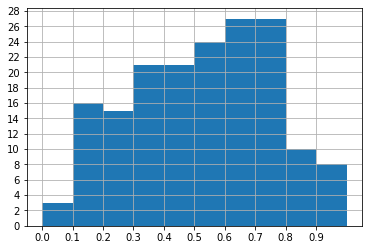

In [12]:
recent_grads['ShareWomen'].hist(bins=10, range=(0,1))
plt.xticks(np.arange(0,1,0.1))
plt.yticks(np.arange(0,30,2))
plt.show()

In [13]:
majors_female = 100 * ((24 + 27 + 27 + 10 + 8)/(recent_grads.shape[0]))
majors_male = 100 - majors_female

print ("Thus,", round(majors_female, 2), " % of majors are predominantly female and", round(majors_male, 2), " % are predominantely male")

Thus, 55.81  % of majors are predominantly female and 44.19  % are predominantely male


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

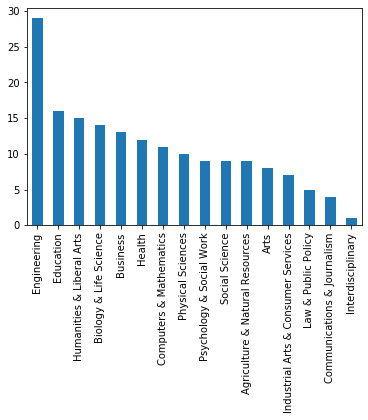

In [18]:
recent_grads['Major_category'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

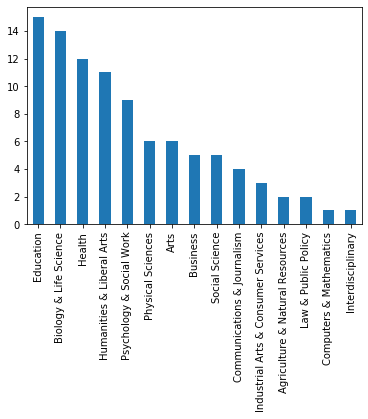

In [17]:
women_bol = recent_grads['ShareWomen'] > 0.5
women_df = recent_grads[women_bol]
women_df['Major_category'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)


From this graphic, it is clear that women has a lower participation in STEM subjects, specially Engineering, even though it comprises the majority of majors.

### What's the most common median salary range?

For this analysis, we will plot a histogram for the `median` column:

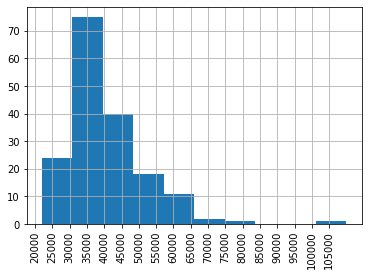

In [19]:
recent_grads["Median"].hist(bins=10, range=(22000,110000))
plt.xticks(np.arange(20000,110000,5000), rotation=90)

plt.show()

Therefore, we can infer that the most common median salary range is \\$30.000 - \\$45.000

## **Exploring data by boxplots**

In [51]:
#Exploring data by scatter-matrix
# hist_args = {'bins':15,}
# axes = pd.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10), hist_kwds = hist_args)


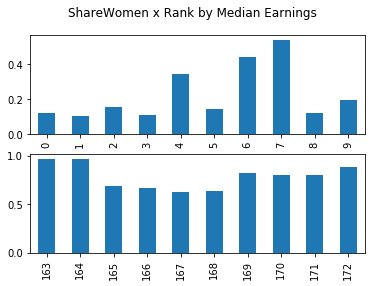

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1)
recent_grads['ShareWomen'].head(10).plot(kind='bar', ax=ax1)
recent_grads['ShareWomen'].tail(10).plot(kind='bar', ax=ax2)
fig.suptitle('ShareWomen x Rank by Median Earnings')
plt.show()

As the dataset is ordered by rank and it is directly correlated with median earnings, we can infer that as the women percentage increases, the median earnings decreases.

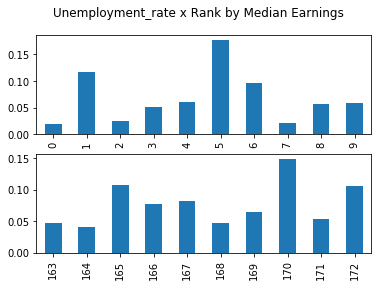

In [62]:
fig, (ax1, ax2) = plt.subplots(2, 1)
recent_grads['Unemployment_rate'].head(10).plot(kind='bar', ax=ax1)
recent_grads['Unemployment_rate'].tail(10).plot(kind='bar', ax=ax2)
fig.suptitle('Unemployment_rate x Rank by Median Earnings')
plt.show()

As expected, as the Median Earning decreases, the unemployment rate increases.